In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import os

# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÏôÄ ÌôïÏù∏

In [2]:
#Îç∞Ïù¥ÌÑ∞ ÏùΩÍ∏∞
import pandas as pd

# Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Î¥ÖÏãúÎã§. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

# 2) Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±
- Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ, Í≤∞Ï∏°Ïπò Ï†úÍ±∞, ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥Ï†úÍ±∞, ÏÇ¨Ï†ÑÍµ¨ÏÑ±
- X_train, y_train, X_test, y_test, word_to_index Î¶¨ÌÑ¥

In [36]:
#Îç∞Ïù¥ÌÑ∞ Î°úÎçî Íµ¨ÏÑ±
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, text_data, num_words = 10000):
    #Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ, NaN Ï†úÍ±∞
    train_data.drop_duplicates(subset = 'document', inplace = True)
    train_data.dropna(subset = ['document'], inplace = True)
    
    test_data.drop_duplicates(subset = 'document', inplace = True)
    test_data.dropna(subset = ['document'], inplace = True)
    
    #ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_train = []
    for text in train_data['document']:
        tmp = tokenizer.morphs(text)
        tmp = [word for word in tmp if word not in stopwords]
        X_train.append(tmp)
    
    X_test = []
    for text in test_data['document']:
        tmp = tokenizer.morphs(text)
        tmp = [word for word in tmp if word not in stopwords]
        X_test.append(tmp)
        
    
    #ÏÇ¨Ï†Ñ word_to_index Íµ¨ÏÑ±
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    
    
    #ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§ Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
    def wordlist_to_indexlist(word_list):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in word_list]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
    
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [37]:
len(word_to_index)

9997

# 3) Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ
- Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
- Ï†ÅÏ†àÌïú ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï -> ÏÉÅÏúÑ 95 %Î•º Ìè¨Ìï®ÌïòÎäî Í∏∏Ïù¥ : 47Î°ú ÏÑ§Ï†ï
- keras.preprocessing.sequence.pad_sequencesÏùÑ ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞Ä

In [38]:
#index to word, word to index ÏÉùÏÑ±
index_to_word = {index:word for word, index in word_to_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

In [39]:
index_to_word

{3: '<UNUSED>',
 4: '.',
 5: 'ÏòÅÌôî',
 6: 'Îã§',
 7: 'Í≥†',
 8: 'Ìïò',
 9: 'ÏùÑ',
 10: 'Î≥¥',
 11: '..',
 12: 'Í≤å',
 13: ',',
 14: '!',
 15: 'ÏßÄ',
 16: 'Ïûà',
 17: 'ÏóÜ',
 18: '?',
 19: 'Ï¢ã',
 20: 'ÎÇò',
 21: 'Ïóà',
 22: 'Îßå',
 23: 'ÎäîÎç∞',
 24: 'ÎÑàÎ¨¥',
 25: 'Î¥§',
 26: 'Ï†Å',
 27: 'Ïïà',
 28: 'Ï†ïÎßê',
 29: 'Î°ú',
 30: 'Ïùå',
 31: 'Í≤É',
 32: 'ÏïÑ',
 33: 'ÎÑ§Ïöî',
 34: 'Ïû¨Î∞å',
 35: 'Ïñ¥',
 36: 'Í∞ô',
 37: 'Ï†ê',
 38: 'ÏßÄÎßå',
 39: 'ÏßÑÏßú',
 40: 'Ìñà',
 41: 'ÏóêÏÑú',
 42: 'Í∏∞',
 43: 'ÎÑ§',
 44: 'Ïïä',
 45: 'Í±∞',
 46: 'Ïïò',
 47: 'Ïàò',
 48: 'Îêò',
 49: 'Î©¥',
 50: '„Öã„Öã',
 51: 'Îßê',
 52: 'Ïó∞Í∏∞',
 53: 'Ïù∏',
 54: 'Ï£º',
 55: 'ÎÇ¥',
 56: 'ÏµúÍ≥†',
 57: '~',
 58: 'ÌèâÏ†ê',
 59: 'Ïù¥Îü∞',
 60: 'Îçò',
 61: 'Ïñ¥Ïöî',
 62: 'Ìï†',
 63: 'Ïôú',
 64: 'Í≤†',
 65: '1',
 66: 'Ïä§ÌÜ†Î¶¨',
 67: 'Ìï¥',
 68: 'ÏäµÎãàÎã§',
 69: '„Öã„Öã„Öã',
 70: '...',
 71: 'ÎìúÎùºÎßà',
 72: 'ÏÉùÍ∞Å',
 73: 'ÏïÑÎãà',
 74: 'Îçî',
 75: 'Í∑∏',
 76: 'Ïã∂',
 77: 'ÏÇ¨Îûå',
 78: 'ÎìØ',
 79: 'Îïå',
 80: 'Í∞êÎèô'

In [40]:
#Ïã§Ï†ú Ïù∏ÏΩîÎî© Ïù∏Îç±Ïä§Îäî Ï†úÍ≥µÎêú word_to_indexÏóêÏÑú index Í∏∞Ï§ÄÏúºÎ°ú 3Ïî© Îí§Î°ú Î∞ÄÎ†§ ÏûàÏäµÎãàÎã§.  
word_to_index = {k:(v+1) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3
word_to_index




{'': 4,
 '.': 5,
 'ÏòÅÌôî': 6,
 'Îã§': 7,
 'Í≥†': 8,
 'Ìïò': 9,
 'ÏùÑ': 10,
 'Î≥¥': 11,
 '..': 12,
 'Í≤å': 13,
 ',': 14,
 '!': 15,
 'ÏßÄ': 16,
 'Ïûà': 17,
 'ÏóÜ': 18,
 '?': 19,
 'Ï¢ã': 20,
 'ÎÇò': 21,
 'Ïóà': 22,
 'Îßå': 23,
 'ÎäîÎç∞': 24,
 'ÎÑàÎ¨¥': 25,
 'Î¥§': 26,
 'Ï†Å': 27,
 'Ïïà': 28,
 'Ï†ïÎßê': 29,
 'Î°ú': 30,
 'Ïùå': 31,
 'Í≤É': 32,
 'ÏïÑ': 33,
 'ÎÑ§Ïöî': 34,
 'Ïû¨Î∞å': 35,
 'Ïñ¥': 36,
 'Í∞ô': 37,
 'Ï†ê': 38,
 'ÏßÄÎßå': 39,
 'ÏßÑÏßú': 40,
 'Ìñà': 41,
 'ÏóêÏÑú': 42,
 'Í∏∞': 43,
 'ÎÑ§': 44,
 'Ïïä': 45,
 'Í±∞': 46,
 'Ïïò': 47,
 'Ïàò': 48,
 'Îêò': 49,
 'Î©¥': 50,
 '„Öã„Öã': 51,
 'Îßê': 52,
 'Ïó∞Í∏∞': 53,
 'Ïù∏': 54,
 'Ï£º': 55,
 'ÎÇ¥': 56,
 'ÏµúÍ≥†': 57,
 '~': 58,
 'ÌèâÏ†ê': 59,
 'Ïù¥Îü∞': 60,
 'Îçò': 61,
 'Ïñ¥Ïöî': 62,
 'Ìï†': 63,
 'Ïôú': 64,
 'Í≤†': 65,
 '1': 66,
 'Ïä§ÌÜ†Î¶¨': 67,
 'Ìï¥': 68,
 'ÏäµÎãàÎã§': 69,
 '„Öã„Öã„Öã': 70,
 '...': 71,
 'ÎìúÎùºÎßà': 72,
 'ÏÉùÍ∞Å': 73,
 'ÏïÑÎãà': 74,
 'Îçî': 75,
 'Í∑∏': 76,
 'Ïã∂': 77,
 'ÏÇ¨Îûå': 78,
 'ÎìØ': 79,
 'Îïå': 80,
 'Í∞êÎèô': 81,
 'Ìï®

ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ :  116
ÏµúÏ¥à Î¨∏Ïû• Í∏∏Ïù¥ :  0
ÌèâÍ∑† Î¨∏Ïû• Í∏∏Ïù¥ :  15.96940191154864
ÏÉÅÏúÑ 95%Îäî 47 Ïù¥ÌïòÏûÖÎãàÎã§.


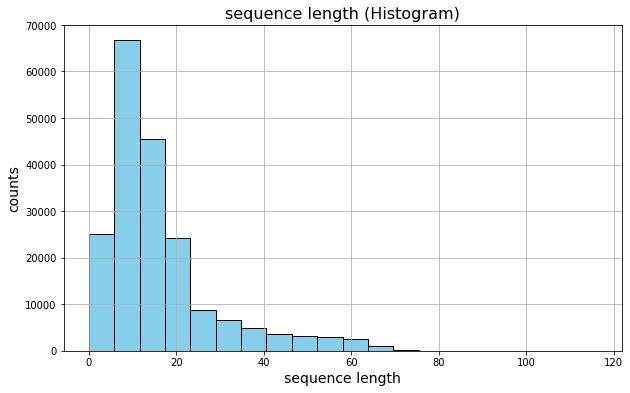

In [7]:
#Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
dataset = list(X_train) + list(X_test)
num_tokens = [len(tokens) for tokens in dataset]
num_tokens = np.array(num_tokens)
print('ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ : ',max(num_tokens)) #ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ 116
print('ÏµúÏ¥à Î¨∏Ïû• Í∏∏Ïù¥ : ',min(num_tokens))
print('ÌèâÍ∑† Î¨∏Ïû• Í∏∏Ïù¥ : ',np.mean(num_tokens))
perc95_len = int(np.percentile(num_tokens, 95))
print(f"ÏÉÅÏúÑ 95%Îäî {perc95_len} Ïù¥ÌïòÏûÖÎãàÎã§.")
maxlen = perc95_len
import matplotlib.pyplot as plt
# seq_len: Í∞Å Î¨∏Ïû•Ïùò Í∏∏Ïù¥ Î¶¨Ïä§Ìä∏
plt.figure(figsize=(10, 6))
plt.hist(num_tokens, bins=20, color='skyblue', edgecolor='black')  # bin ÏàòÎäî Ï°∞Ï†à Í∞ÄÎä•
plt.title('sequence length (Histogram)', fontsize=16)
plt.xlabel('sequence length', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.grid(True)
plt.show()


In [8]:
#PAD, BOS, UNK, UNUSED Î•º Ï∂îÍ∞ÄÌïòÎäî ÏûëÏóÖÏùÑ Ìï©ÎãàÎã§.
#Ïã§Ï†ú Ïù∏ÏΩîÎî© Ïù∏Îç±Ïä§Îäî Ï†úÍ≥µÎêú word_to_indexÏóêÏÑú index Í∏∞Ï§ÄÏúºÎ°ú 3Ïî© Îí§Î°ú Î∞ÄÎ†§ ÏûàÏäµÎãàÎã§.  
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

# Ï≤òÏùå Î™á Í∞ú Ïù∏Îç±Ïä§Îäî ÏÇ¨Ï†ÑÏóê Ï†ïÏùòÎêòÏñ¥ ÏûàÏäµÎãàÎã§
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' Í∞Ä Ï∂úÎ†•Îê©ÎãàÎã§.

<BOS>


In [58]:
#keras.preprocessing.sequence.pad_sequencesÏùÑ ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞Ä
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# padding Ï†ÅÏö© (ÏïûÏùÑ 0ÏúºÎ°ú Ï±ÑÏö∞Îäî 'pre' Î∞©Ïãù, ÌïÑÏöîÏãú 'post'ÎèÑ Í∞ÄÎä•)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='pre')
X_test =tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='pre')

# Í≤∞Í≥º ÌôïÏù∏
print("Ìå®Îî© ÌõÑ X_train shape:", X_train.shape)
print("Ìå®Îî© ÌõÑ X_test shape:", X_test.shape)

Ìå®Îî© ÌõÑ X_train shape: (146182, 47)
Ìå®Îî© ÌõÑ X_test shape: (49157, 47)


# 4) Î™®Îç∏ Íµ¨ÏÑ± Î∞è validation set Íµ¨ÏÑ±
- CNN Í∏∞Î∞ò Î™®Îç∏
- LSTM Í∏∞Î∞ò Î™®Îç∏
- Transformer Í∏∞Î∞ò Î™®Îç∏

In [10]:
#validation set Î∂ÑÎ¶¨
val_split = int(len(X_train)* 0.3)
x_val = X_train[:val_split]
y_val = y_train[:val_split]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ 15000Í±¥
partial_x_train = X_train[val_split:]  
partial_y_train = y_train[val_split:]

print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape)
print(y_val.shape)

(102328, 47)
(102328,)
(43854, 47)
(43854,)


## Simple RNN

Epoch 1/20
200/200 [==============================] - 10s 43ms/step - loss: 0.5151 - accuracy: 0.7283 - val_loss: 0.3641 - val_accuracy: 0.8396
Epoch 2/20
200/200 [==============================] - 8s 41ms/step - loss: 0.3498 - accuracy: 0.8508 - val_loss: 0.3543 - val_accuracy: 0.8452
Epoch 3/20
200/200 [==============================] - 8s 42ms/step - loss: 0.3179 - accuracy: 0.8679 - val_loss: 0.3581 - val_accuracy: 0.8470
Epoch 4/20
200/200 [==============================] - 8s 42ms/step - loss: 0.2895 - accuracy: 0.8837 - val_loss: 0.3829 - val_accuracy: 0.8372
Epoch 5/20
200/200 [==============================] - 8s 42ms/step - loss: 0.2533 - accuracy: 0.9011 - val_loss: 0.3985 - val_accuracy: 0.8349
Epoch 6/20
200/200 [==============================] - 8s 42ms/step - loss: 0.2177 - accuracy: 0.9179 - val_loss: 0.4412 - val_accuracy: 0.8275
Epoch 7/20
200/200 [==============================] - 8s 42ms/step - loss: 0.1886 - accuracy: 0.9304 - val_loss: 0.4819 - val_accuracy: 0.817

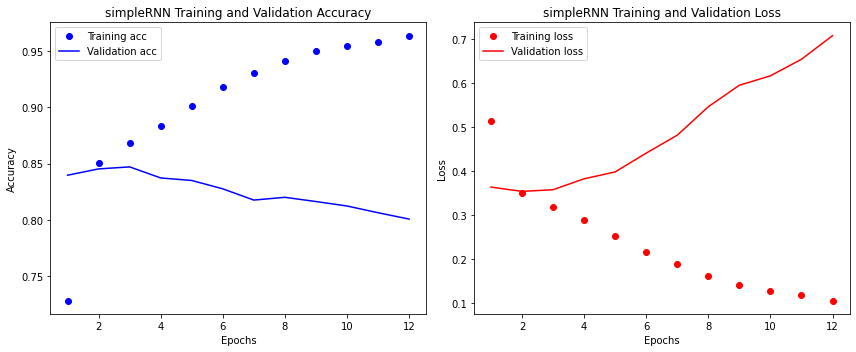

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
vocab_size = len(word_to_index) + 1    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞
word_vector_dim = 16  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
model_rnn = Sequential([
    Embedding(vocab_size, word_vector_dim, input_length=maxlen),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Í≥ºÏ†ÅÌï©Î∞©ÏßÄÎ•º ÏúÑÌïú early stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10) 

epochs=20 # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model_rnn.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,callbacks = [es],
                    validation_data=(x_val, y_val),
                    verbose=1)
results = model_rnn.evaluate(X_test,  y_test, verbose=2)

print(results)
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# üîπ 1. Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)  # (1Ìñâ, 2Ïó¥, 1Î≤àÏß∏)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('simpleRNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# üîπ 2. ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)  # (1Ìñâ, 2Ïó¥, 2Î≤àÏß∏)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('simpleRNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## CNN Í∏∞Î∞ò Î™®Îç∏(Conv1D, GlobalMaxPooling1D)

Epoch 1/20
200/200 [==============================] - 4s 7ms/step - loss: 0.4927 - accuracy: 0.7657 - val_loss: 0.3602 - val_accuracy: 0.8426
Epoch 2/20
200/200 [==============================] - 1s 5ms/step - loss: 0.3300 - accuracy: 0.8608 - val_loss: 0.3423 - val_accuracy: 0.8516
Epoch 3/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2923 - accuracy: 0.8793 - val_loss: 0.3420 - val_accuracy: 0.8531
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2640 - accuracy: 0.8936 - val_loss: 0.3464 - val_accuracy: 0.8545
Epoch 5/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2375 - accuracy: 0.9066 - val_loss: 0.3555 - val_accuracy: 0.8532
Epoch 6/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2116 - accuracy: 0.9189 - val_loss: 0.3708 - val_accuracy: 0.8501
Epoch 7/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1845 - accuracy: 0.9316 - val_loss: 0.3988 - val_accuracy: 0.8488
Epoch 

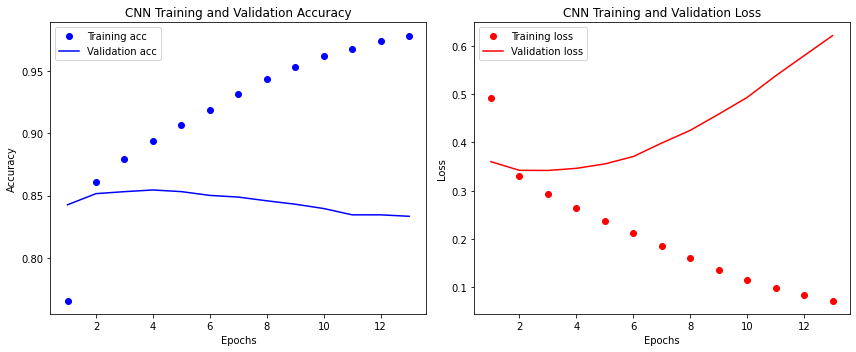

In [12]:
#Î™®Îç∏ Íµ¨ÏÑ±
vocab_size = len(word_to_index) + 1    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞
word_vector_dim = 16  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

# model ÏÑ§Í≥Ñ - Îî•Îü¨Îãù Î™®Îç∏ ÏΩîÎìúÎ•º ÏßÅÏ†ë ÏûëÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
model_cnn.add(tf.keras.layers.Conv1D(64, 5, activation = 'relu'))
model_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn.add(tf.keras.layers.Dense(16, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Í≥ºÏ†ÅÌï©Î∞©ÏßÄÎ•º ÏúÑÌïú early stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10) 

epochs=20 # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model_cnn.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,callbacks = [es],
                    validation_data=(x_val, y_val),
                    verbose=1)
results = model_cnn.evaluate(X_test,  y_test, verbose=2)

print(results)
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# üîπ 1. Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)  # (1Ìñâ, 2Ïó¥, 1Î≤àÏß∏)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# üîπ 2. ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)  # (1Ìñâ, 2Ïó¥, 2Î≤àÏß∏)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## LSTM Î™®Îç∏

Epoch 1/20
200/200 [==============================] - 5s 13ms/step - loss: 0.4658 - accuracy: 0.7695 - val_loss: 0.3551 - val_accuracy: 0.8459
Epoch 2/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3372 - accuracy: 0.8559 - val_loss: 0.3575 - val_accuracy: 0.8430
Epoch 3/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3164 - accuracy: 0.8670 - val_loss: 0.3495 - val_accuracy: 0.8494
Epoch 4/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3072 - accuracy: 0.8724 - val_loss: 0.3550 - val_accuracy: 0.8470
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.2977 - accuracy: 0.8772 - val_loss: 0.3545 - val_accuracy: 0.8470
Epoch 6/20
200/200 [==============================] - 2s 10ms/step - loss: 0.2846 - accuracy: 0.8831 - val_loss: 0.3578 - val_accuracy: 0.8491
Epoch 7/20
200/200 [==============================] - 2s 10ms/step - loss: 0.2695 - accuracy: 0.8894 - val_loss: 0.3558 - val_accuracy: 0.8508

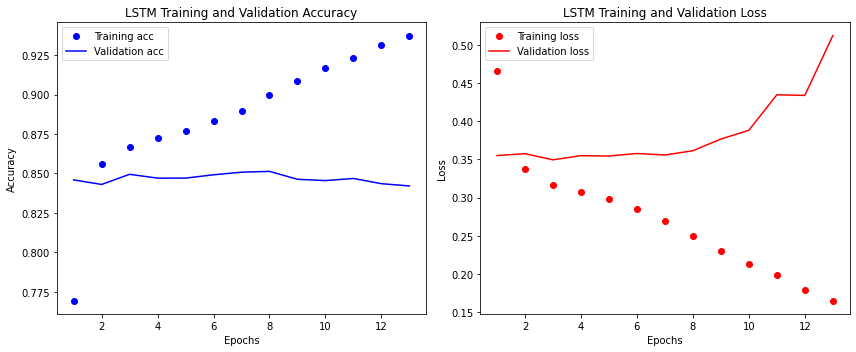

In [13]:
#lstm Í∏∞Î∞ò Î™®Îç∏
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model_lstm = Sequential([
    Embedding(vocab_size, word_vector_dim, input_shape = (None,)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

#Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú early stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20 # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model_lstm.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512, callbacks = [es],
                    validation_data=(x_val, y_val),
                    verbose=1)
results = model_lstm.evaluate(X_test,  y_test, verbose=2)

print('test_result: ',results)
history_dict = history.history
import matplotlib.pyplot as plt

# Î®ºÏ†Ä history Í∞ùÏ≤¥Î°úÎ∂ÄÌÑ∞ Ï†ïÌôïÎèÑ/ÏÜêÏã§ Í∏∞Î°ù Î∂àÎü¨Ïò§Í∏∞
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# ÏóêÌè¨ÌÅ¨ ÏàòÏóê ÎßûÍ≤å xÏ∂ï Î≤îÏúÑ ÏÉùÏÑ±
epochs = range(1, len(acc) + 1)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# üîπ 1. Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# üîπ 2. ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 7) ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [65]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_words(model, word, word_to_index, index_to_word, top_n=10):
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥ Ï∂îÏ∂ú
    embedding_layer = model.layers[0]
    embedding_weights = embedding_layer.get_weights()[0]  # shape: (vocab_size, embedding_dim)

    # Îã®Ïñ¥ Ïù∏Îç±Ïä§ ÌôïÏù∏
    if word not in word_to_index:
        print(f"'{word}' is not in the vocabulary.")
        return

    idx = word_to_index[word]
    target_vector = embedding_weights[idx].reshape(1, -1)

    # Ï†ÑÏ≤¥ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
    similarities = cosine_similarity(target_vector, embedding_weights)[0]

    # Ïú†ÏÇ¨ÎèÑ ÎÜíÏùÄ ÏÉÅÏúÑ top_n Îã®Ïñ¥ Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    similar_idx = similarities.argsort()[::-1][1:top_n+1]  # ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"Words most similar to '{word}':\n")
    for i in similar_idx:
        similar_word = index_to_word.get(i, "?")
        print(f"{similar_word:15} (score: {similarities[i]:.4f})")


In [71]:
print('simple_rnn  ')
find_similar_words(model_rnn, word='ÏòÅÌôî', word_to_index=word_to_index, index_to_word=index_to_word, top_n=10)
print('='*40)
print('cnn  ')
find_similar_words(model_cnn, word='ÏòÅÌôî', word_to_index=word_to_index, index_to_word=index_to_word, top_n=10)
print('='*40)
print('lstm ')
find_similar_words(model_lstm, word='ÏòÅÌôî', word_to_index=word_to_index, index_to_word=index_to_word, top_n=10)

simple_rnn  
Words most similar to 'ÏòÅÌôî':

Ï†∏ÏÑú              (score: 0.7561)
Î≥¥Îã§              (score: 0.7013)
Î≤ïÏπô              (score: 0.6883)
ÌïúÌé∏              (score: 0.6815)
Ïû¨Î∞©              (score: 0.6597)
ÎÅùÎÇò              (score: 0.6407)
Í±¥Í∞ÄÏöî             (score: 0.6362)
Ï°å               (score: 0.6315)
.................. (score: 0.6164)
Ìù°ÏÇ¨              (score: 0.6147)
cnn  
Words most similar to 'ÏòÅÌôî':

Ï≤úÍµ≠              (score: 0.7589)
ÏàúÏúÑ              (score: 0.7538)
Î∂ÑÎ™ÖÌûà             (score: 0.7531)
ÎßàÎ∏î              (score: 0.7375)
Î∞ñÏóî              (score: 0.7364)
ÏõîÎìúÏªµ             (score: 0.7331)
Ï§ÄÎã§              (score: 0.7307)
Î¶¨Îùº              (score: 0.7251)
ÏïºÍ≤†Îã§             (score: 0.7208)
ÌîÑÎûëÏä§             (score: 0.7149)
lstm 
Words most similar to 'ÏòÅÌôî':

Ïó¥               (score: 0.7558)
Í∞ïÏù∏              (score: 0.7335)
Ï£ºÎèÑ              (score: 0.6739)
Ìûò               (score: 0.6709)
ÌóåÎç∞   

# 8) ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî©ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†
- ÌïúÍµ≠Ïñ¥ Word2VecÏùÄ /data Ìè¥Îçî ÏïàÏóê ÏûàÎäî word2vec_ko.modelÏùÑ ÌôúÏö©ÌïòÏÑ∏Ïöî.
- ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÌôúÏö©Ìï† ÎïåÎäî load_word2vec_format() ÌòïÌÉúÍ∞Ä ÏïÑÎãå load() ÌòïÌÉúÎ°ú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄÏ£ºÏÑ∏Ïöî. ÎòêÌïú Î™®Îç∏ÏùÑ ÌôúÏö©Ìï† ÎïåÏóêÎäî ÏïÑÎûò ÏòàÏãúÏôÄ Í∞ôÏù¥ .wvÎ•º Î∂ôÏó¨ÏÑú ÌôúÏö©Ìï©ÎãàÎã§. Ï¢ÄÎçî ÏûêÏÑ∏Ìïú ÌôúÏö©Î≤ïÏóê ÎåÄÌï¥ÏÑ† Îã§Ïùå ÎßÅÌÅ¨Îì§ÏùÑ Ï∞∏Ï°∞Ìï¥Ï£ºÏÑ∏Ïöî. Ï∞∏Í≥† ÎßÅÌÅ¨1, Ï∞∏Í≥† ÎßÅÌÅ¨2
# ÏòàÏãú ÏΩîÎìú
from gensim.models.keyedvectors import Word2VecKeyedVectors
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv[‚ÄòÎÅù‚Äô]

In [16]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
model_path = '/aiffel/data/word2vec_ko.model'
word2vec = Word2VecKeyedVectors.load(model_path)  
vector = word2vec.wv['ÎìúÎùºÎßà']
vector

array([-0.20973422, -0.61096764, -0.9033131 ,  2.957383  ,  1.8569387 ,
        1.2706641 , -3.7683392 , -2.802115  , -0.7573312 ,  1.0417593 ,
       -3.6991544 , -1.2614148 , -1.5790688 , -4.00267   ,  4.5657935 ,
       -1.1776268 , -1.9514618 , -0.68296045, -0.572553  , -1.1169969 ,
        0.03167932,  1.6880232 , -1.0688471 ,  2.1305177 , -0.08913164,
       -1.8747901 , -2.118389  ,  3.6970801 , -1.2416158 , -0.68125457,
       -3.6551244 ,  3.292321  ,  3.5484762 ,  0.08252752,  2.6031404 ,
        4.5135202 ,  1.4255892 ,  0.47073746, -3.4152977 , -0.77570534,
        2.4108121 , -2.0590503 ,  1.2684485 ,  2.492074  ,  0.976352  ,
        2.8478534 ,  1.4469601 ,  2.914614  ,  2.215515  , -3.5052524 ,
       -1.0651278 , -2.7645462 ,  2.8813627 , -4.223422  , -1.2215286 ,
       -2.6441448 ,  4.1211653 , -1.6006311 , -0.6597083 , -0.6771537 ,
       -1.0426844 ,  3.6979783 ,  3.2398548 , -0.3411325 , -0.34871313,
        0.76309395, -2.778278  , -0.32589075, -0.9296699 , -1.31

In [45]:
vocab_size = 10000  # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = word2vec.vector_size # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî©ÎßàÎã§ Ï∞®Î°ÄÏ∞®Î°Ä Ïπ¥ÌîºÌïúÎã§.
# Word2Vec Í∞ùÏ≤¥ÏóêÏÑú Îã®Ïñ¥ Î≤°ÌÑ∞ Ï†ëÍ∑ºÏùÄ .wv
for i in range(4, vocab_size):
    word = index_to_word.get(i)
    if word and word in word2vec.wv:
        embedding_matrix[i] = word2vec.wv[word]


In [54]:
from tensorflow.keras.initializers import Constant
import keras

vocab_size = 10000   # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = word2vec.vector_size # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò

# Î™®Îç∏ Íµ¨ÏÑ±
model_word2vec = keras.Sequential()
model_word2vec.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # Ïπ¥ÌîºÌïú ÏûÑÎ≤†Îî©ÏùÑ Ïó¨Í∏∞ÏÑú ÌôúÏö©
                                 input_length=maxlen, 
                                 trainable=True))   # trainableÏùÑ TrueÎ°ú Ï£ºÎ©¥ Fine-tuning
model_word2vec.add(keras.layers.LSTM(512))   # Í∞ÄÏû• ÎÑêÎ¶¨ Ïì∞Ïù¥Îäî RNNÏù∏ LSTM Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÏòÄÏäµÎãàÎã§. Ïù¥Îïå LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàòÎäî 8Î°ú ÌïòÏòÄÏäµÎãàÎã§. (Î≥ÄÍ≤Ω Í∞ÄÎä•)
model_word2vec.add(keras.layers.Dense(16, activation='relu'))
model_word2vec.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.


model_word2vec.summary()

#Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú early stopping
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
# ÌïôÏäµÏùò ÏßÑÌñâ
model_word2vec.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model_word2vec.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,callbacks=[es],
                    validation_data=(x_val, y_val),
                    verbose=1)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 47, 100)           1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 512)               1255424   
_________________________________________________________________
dense_14 (Dense)             (None, 16)                8208      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 2,263,649
Trainable params: 2,263,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
400/400 [==============================] - 20s 47ms/step - loss: 0.4520 - accuracy: 0.7835 - val_loss: 0.3626 - val_accuracy: 0.8383
Epoch 2/20
400/400 [==============================] - 18s 46ms/step - loss: 0.3232 - accuracy: 0.8

### word2vec Ï†ÅÏö© Accuracy : 0.8530
- simple rnn accuracy: 0.7957
- cnn accuracy: 0.8274
- lstm accuracy: 0.8382

In [59]:
# ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌïú Î™®Îç∏ ÌèâÍ∞Ä # 85% Ïù¥ÏÉÅ
results = model_word2vec.evaluate(X_test, y_test, verbose=2)

print('test_result : ', results)

1537/1537 - 5s - loss: 0.8132 - accuracy: 0.8530
test_result :  [0.8131754398345947, 0.8530219793319702]


In [63]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


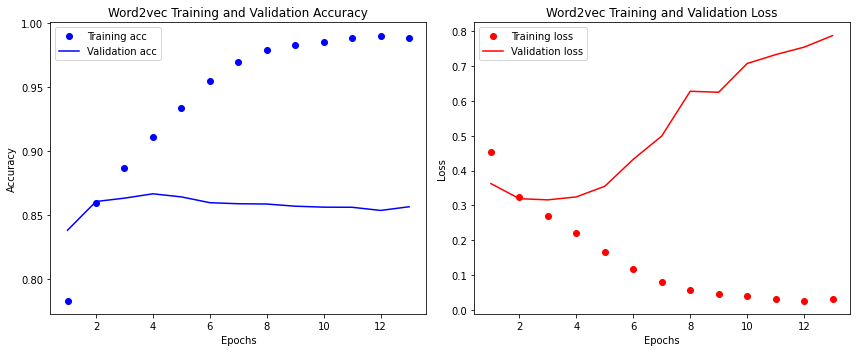

In [64]:
# Î®ºÏ†Ä history Í∞ùÏ≤¥Î°úÎ∂ÄÌÑ∞ Ï†ïÌôïÎèÑ/ÏÜêÏã§ Í∏∞Î°ù Î∂àÎü¨Ïò§Í∏∞
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# ÏóêÌè¨ÌÅ¨ ÏàòÏóê ÎßûÍ≤å xÏ∂ï Î≤îÏúÑ ÏÉùÏÑ±
epochs = range(1, len(acc) + 1)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# üîπ 1. Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Word2vec Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# üîπ 2. ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Word2vec Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
